In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
meowmeowmeowmeowmeow_gtsrb_german_traffic_sign_path = kagglehub.dataset_download('meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

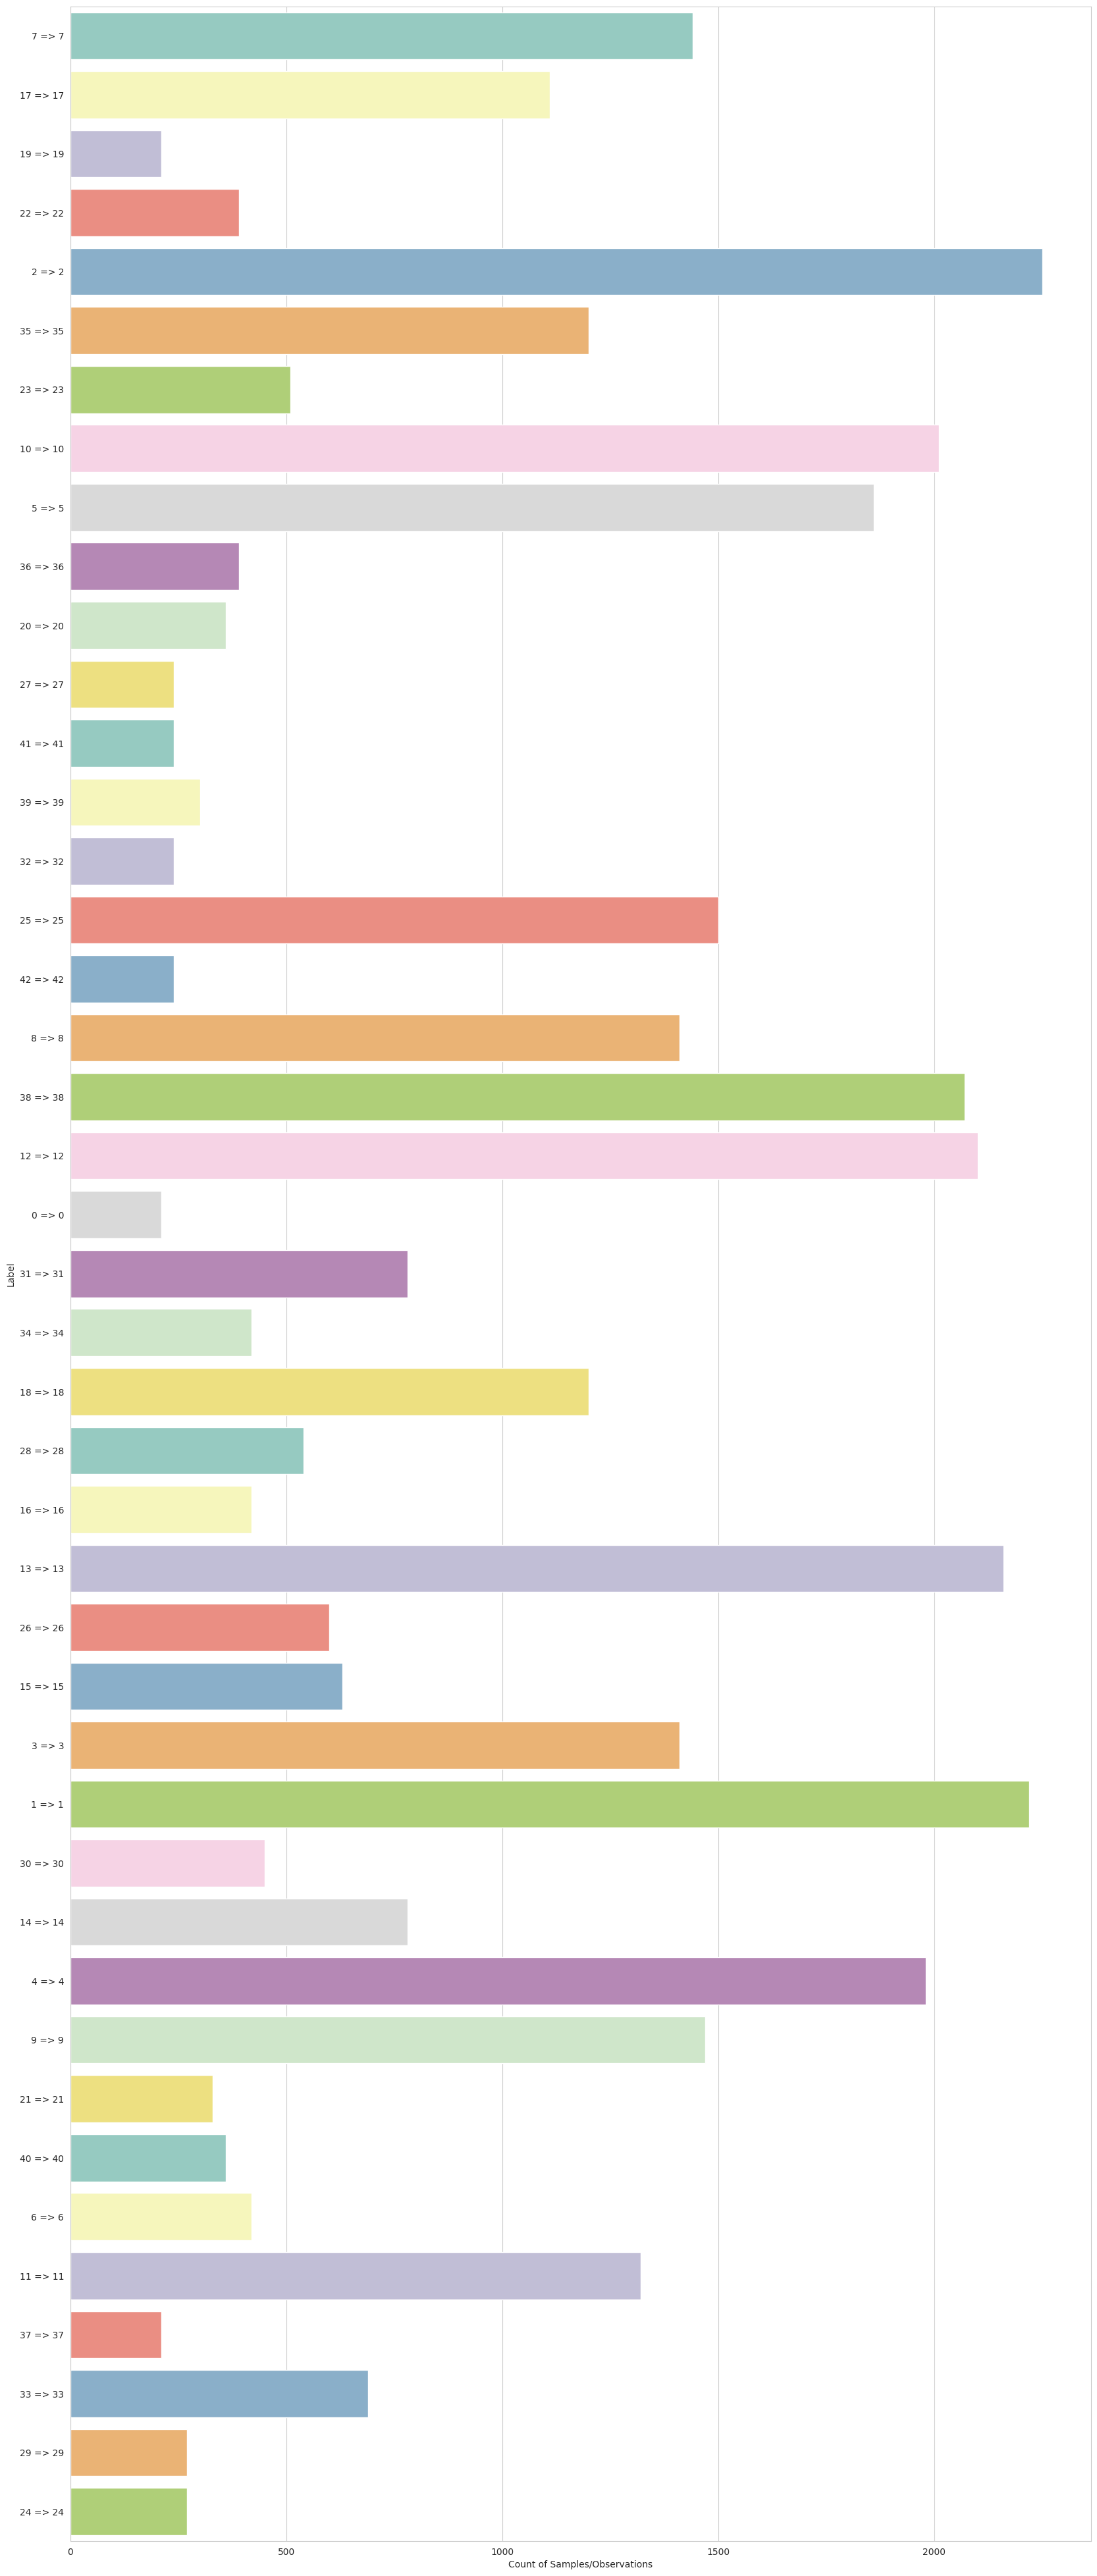

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import time
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set style for plots
sns.set_style('whitegrid')

start = time.time()
input_path = "/kaggle/input/gtsrb-german-traffic-sign"

image_data = []
image_labels = []
lab = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Meta.csv')
d = dict()
class_labels = dict()

for dirs in os.listdir(input_path + '/Train'):
    count = len(os.listdir(input_path + '/Train/' + dirs))
    d[dirs + ' => ' + str(lab[lab.ClassId == int(dirs)].values[0][1])] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

plt.figure(figsize=(20, 50))
sns.barplot(y=list(d.keys()), x=list(d.values()), palette='Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations')
plt.show()



In [ ]:
total_classes = 43
height = 32
width = 32
channels = 3

for i in range(total_classes):
    path = input_path + "/Train/" + str(i)+'/'
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, "RGB")
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in Image loading")



In [ ]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)
end = time.time()
print("Time taken for data loading: ", round(end-start, 5), "seconds")

shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)


# Flatten the images for KNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)



Time taken for data loading:  375.60406 seconds
X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


Time taken to fit model:  0.0662 seconds
Validation Accuracy: 0.9290
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.94      0.94       451
           2       0.90      0.92      0.91       417
           3       0.87      0.86      0.86       304
           4       0.88      0.91      0.89       397
           5       0.84      0.93      0.88       383
           6       0.92      0.96      0.94        76
           7       0.87      0.96      0.91       297
           8       0.88      0.96      0.92       303
           9       0.97      0.96      0.96       300
          10       0.95      0.94      0.94       373
          11       0.96      0.92      0.94       250
          12       0.98      0.92      0.95       433
          13       0.97      0.96      0.97       453
          14       0.99      0.92      0.95       145
          15       0.98      0.93      0.96       120
          16

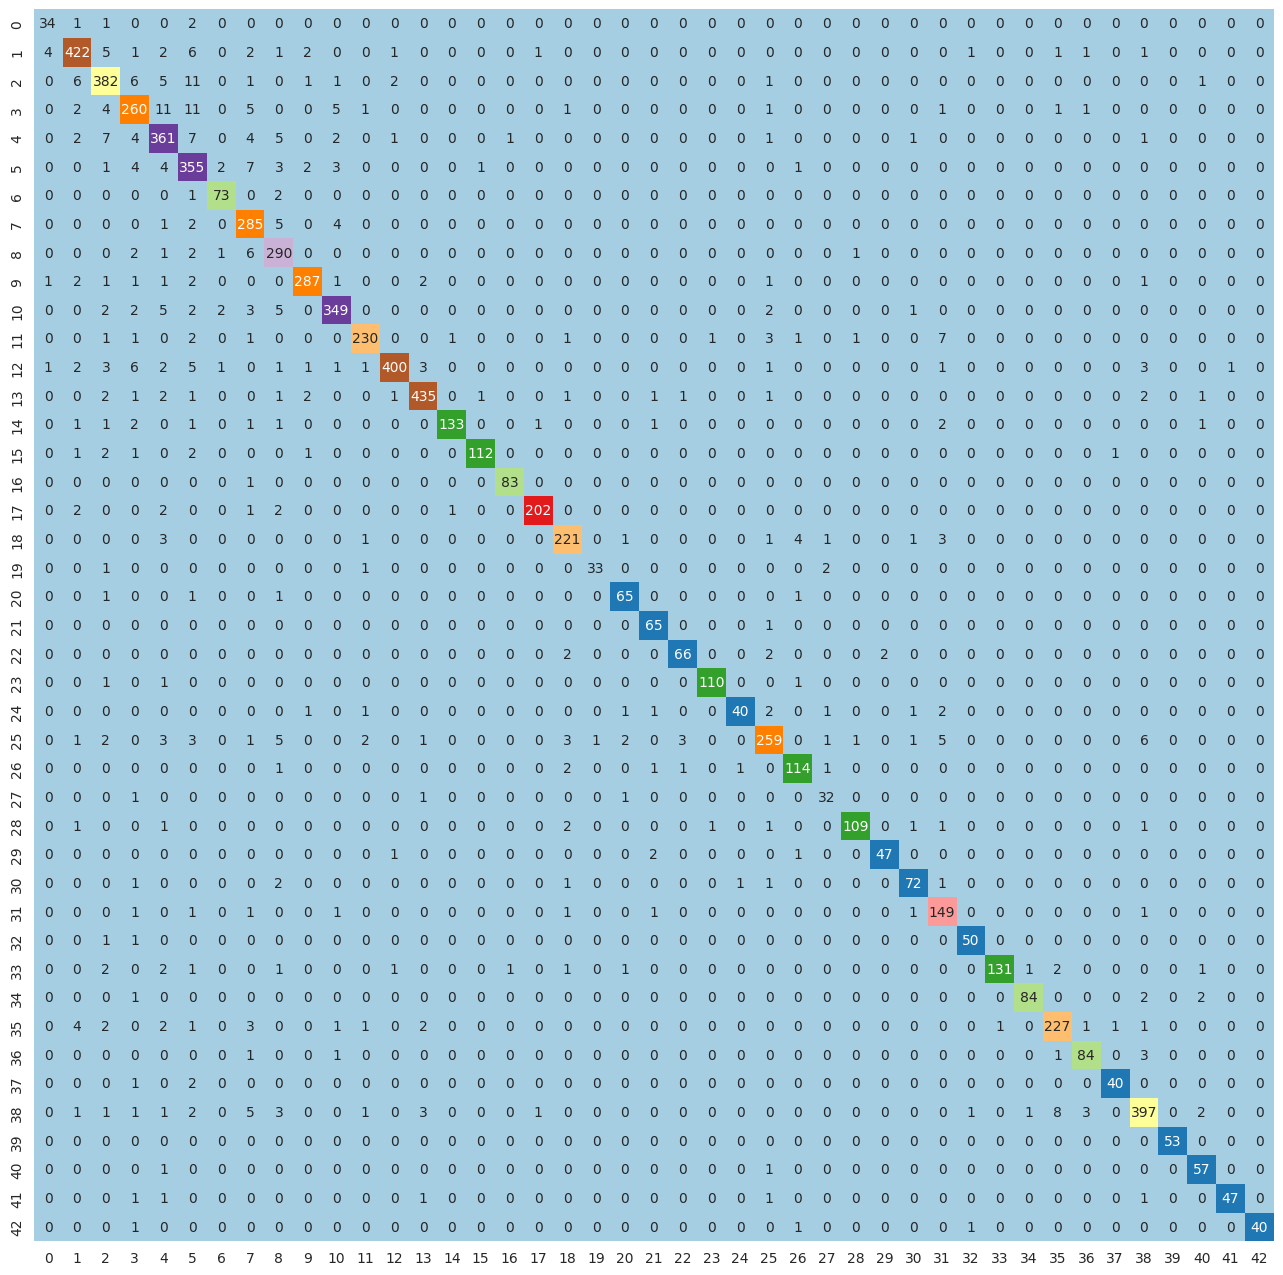

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=1) # You can adjust the number of neighbors (e.g n_neighbors = 7 )
start_training = time.time()
knn.fit(X_train_flat, y_train)
end_training = time.time()
print("Time taken to fit model: ", round(end_training-start_training, 5), "seconds")

# Predictions
y_pred = knn.predict(X_valid_flat)

# Evaluation
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_valid, y_pred, target_names=[str(class_labels[i]) for i in range(43)]))

cmat = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=[str(class_labels[i]) for i in range(43)], yticklabels=[str(class_labels[i]) for i in range(43)]);
plt.show()



Time taken for data loading:  948.61946 seconds
X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)
Time taken to fit model:  998.8534 seconds
Validation Accuracy: 0.8906
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        49
           1       0.89      0.94      0.92       449
           2       0.89      0.90      0.89       472
           3       0.79      0.79      0.79       277
           4       0.76      0.89      0.82       384
           5       0.73      0.82      0.77       378
           6       0.92      0.86      0.89        92
           7       0.94      0.74      0.83       288
           8       0.67      0.84      0.75       277
           9       1.00      0.88      0.94       267
          10       0.71      0.98      0.83       393
          11       0.91      0.93      0.92       244
          12       0.99      0.97      0.98       425
          13  

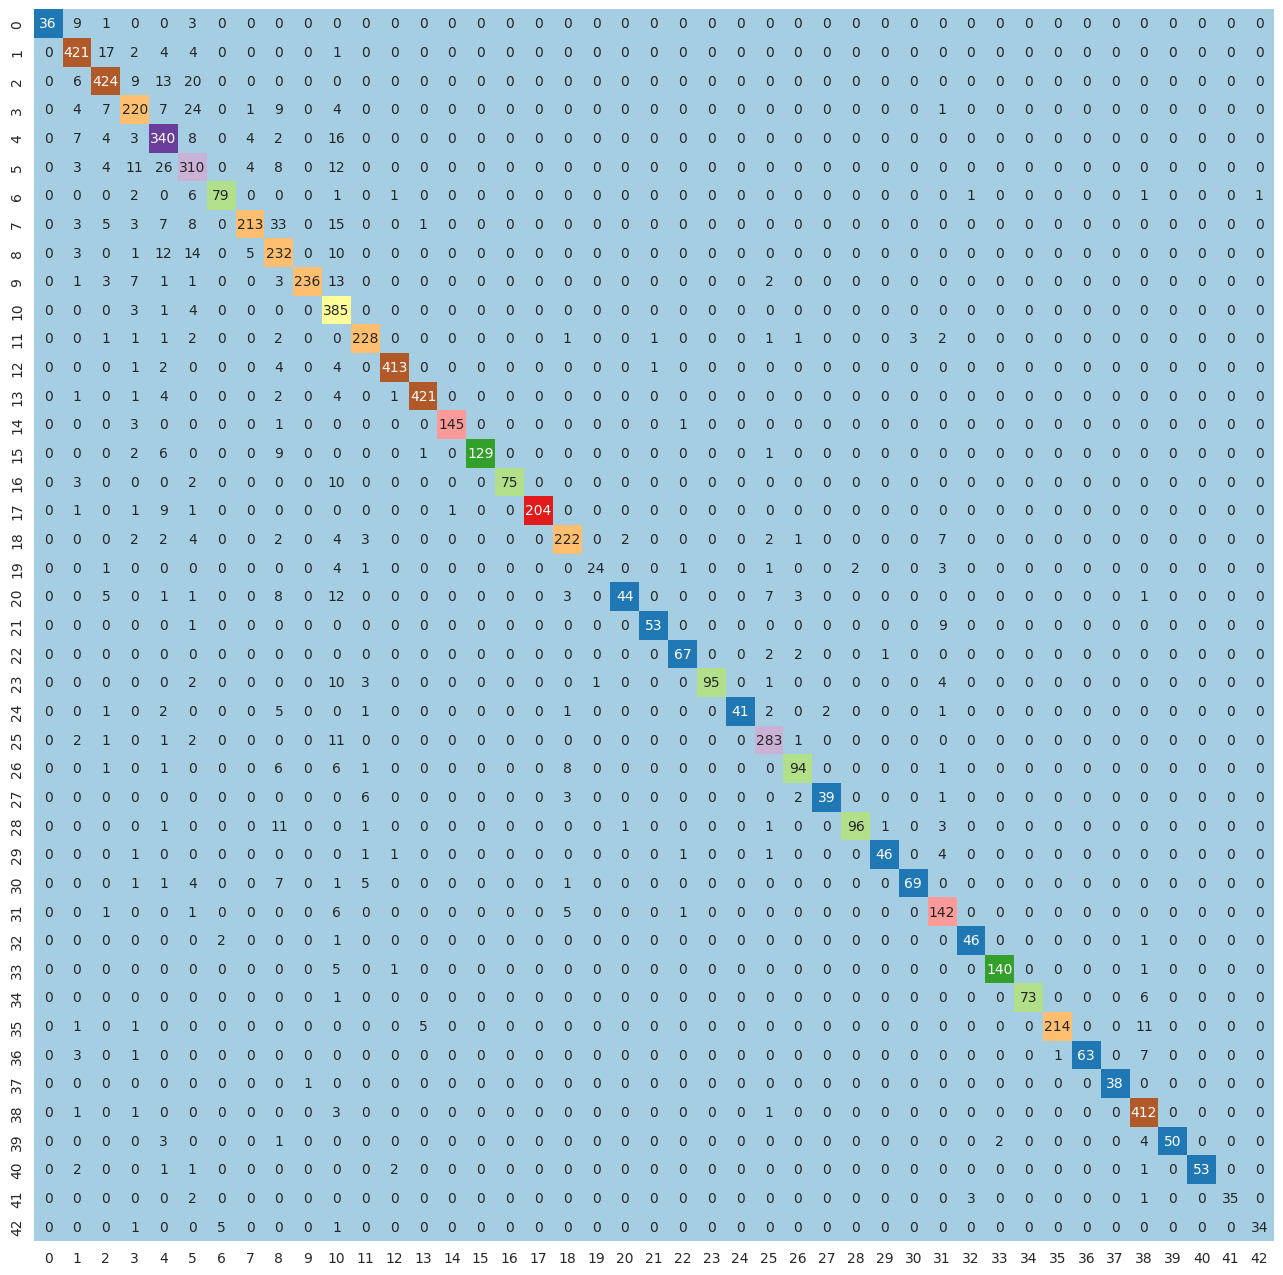

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import time
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

image_data = np.array(image_data)
image_labels = np.array(image_labels)
end = time.time()
print("Time taken for data loading: ", round(end-start, 5), "seconds")

shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

# Flatten the images for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)

# SVM Model
svm = SVC(kernel='rbf', C=1, gamma='scale')  # You can adjust these hyperparameters
start_training = time.time()
svm.fit(X_train_flat, y_train)
end_training = time.time()
print("Time taken to fit model: ", round(end_training-start_training, 5), "seconds")
# Predictions
y_pred = svm.predict(X_valid_flat)

# Evaluation
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_valid, y_pred, target_names=[str(class_labels[i]) for i in range(43)]))

cmat = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=[str(class_labels[i]) for i in range(43)], yticklabels=[str(class_labels[i]) for i in range(43)]);
plt.show()